In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv("Titanic-Dataset.csv")

In [3]:
dataset.drop(["PassengerId","Name","Ticket","Fare","Cabin","Parch"], inplace=True, axis=1)

<Axes: >

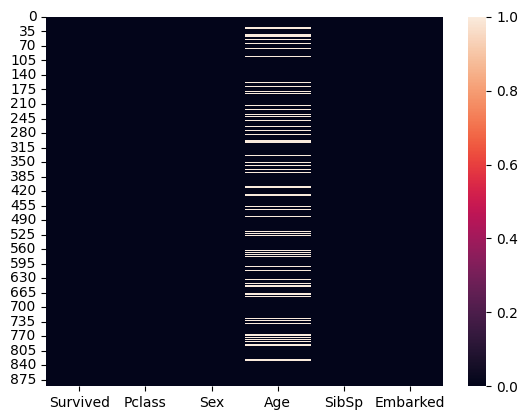

In [5]:
sns.heatmap(dataset.isnull())

In [6]:
int(dataset[dataset["Pclass"] == 1]["Age"].dropna().mean())

38

In [7]:
int(dataset[dataset["Pclass"] == 2]["Age"].dropna().mean())

29

In [8]:
int(dataset[dataset["Pclass"] == 3]["Age"].dropna().mean())

25

In [9]:
def set_age(row):
    Pclass = row[0]
    Age = row[1]
    
    if np.isnan(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [10]:
dataset["Age"] = dataset[["Pclass", "Age"]].apply(set_age, axis=1)

<Axes: >

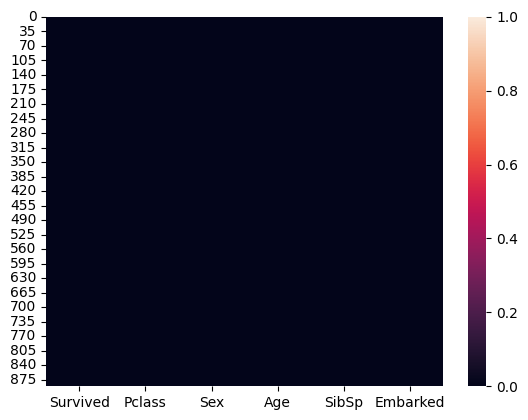

In [11]:
sns.heatmap(dataset.isnull())

<Axes: xlabel='Pclass', ylabel='count'>

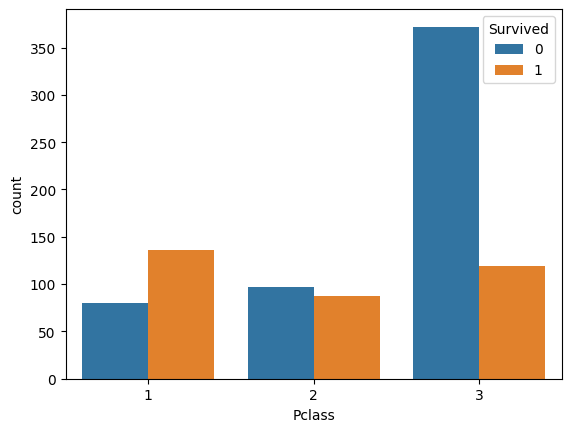

In [12]:
sns.countplot(dataset, x="Pclass", hue="Survived")

<Axes: xlabel='Sex', ylabel='count'>

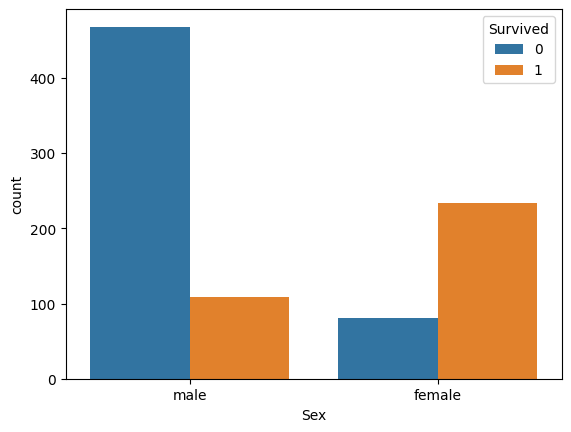

In [13]:
sns.countplot(dataset, x="Sex", hue="Survived")

<Axes: xlabel='SibSp', ylabel='count'>

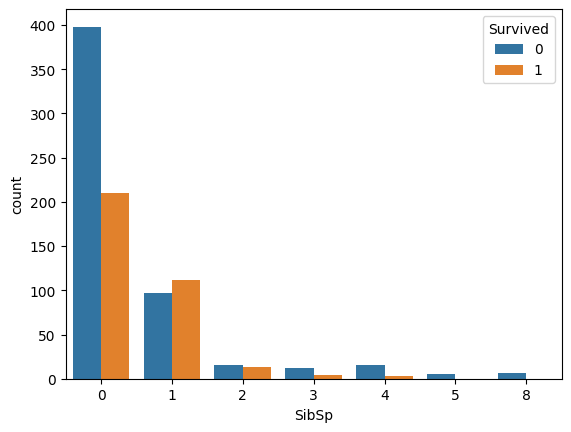

In [14]:
sns.countplot(dataset, x="SibSp", hue="Survived")

<Axes: xlabel='Embarked', ylabel='count'>

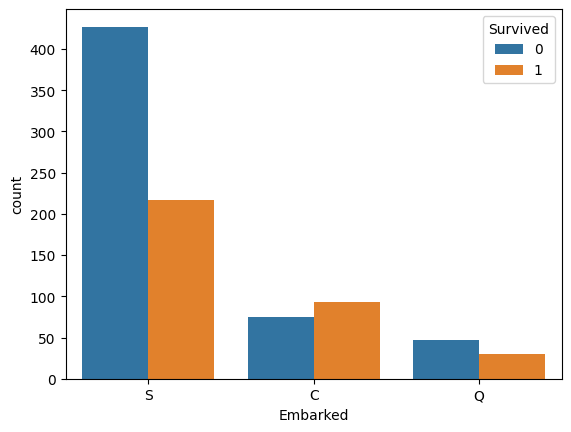

In [15]:
sns.countplot(dataset, x="Embarked", hue="Survived")

In [16]:
Pclass = pd.get_dummies(dataset["Pclass"], drop_first=True, dtype="int")
Sex = pd.get_dummies(dataset["Sex"], drop_first=True, dtype="int")
SibSp = pd.get_dummies(dataset["SibSp"], drop_first=True, dtype="int")
Embarked = pd.get_dummies(dataset["Embarked"], drop_first=True, dtype="int")
dataset.drop(["Pclass","Sex","SibSp","Embarked"], axis=1, inplace=True)
dataset = pd.concat([dataset, Pclass, Sex, SibSp, Embarked], axis=1)

In [17]:
dataset.columns = dataset.columns.astype(str)

In [18]:
dataset

,Survived,Age,2,3,male,1,2,3,4,5,8,Q,S
0,0,22.0,0,1,1,1,0,0,0,0,0,0,1
1,1,38.0,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,0,0,0,1,0,0,0,0,0,0,1
4,0,35.0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,1,0,1,0,0,0,0,0,0,0,1
887,1,19.0,0,0,0,0,0,0,0,0,0,0,1
888,0,25.0,0,1,0,1,0,0,0,0,0,0,1
889,1,26.0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
Y = dataset["Survived"]
X = dataset.drop("Survived", axis=1)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, Y_train)

LogisticRegression()

In [23]:
Y_pred = model.predict(X_test)

<Axes: >

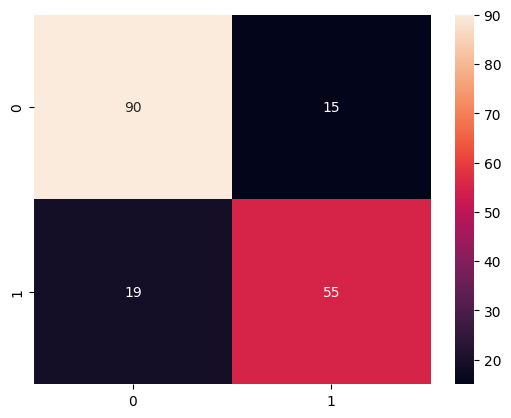

In [24]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

In [25]:
accuracy_score(Y_test, Y_pred) * 100

81.00558659217877